<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/simple_k_means_clustering_on_the_tpc_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print("\nLoading TPC data into memory \n")
data_file = "vTestData102.csv"



Loading TPC data into memory 



In [2]:
df = pd.read_csv(data_file)
#x = dataset.iloc[:, [1, 2, 3, 4]].values

In [3]:
cusid = df['CustomID']
df_old = df.copy()

In [4]:
df = df.drop('CustomID', axis=1)

In [5]:
dataset = np.array(df, dtype=np.float)
dataset_old = dataset.copy()
print(dataset.shape)

(195, 15)


In [6]:
print(type(dataset))

<class 'numpy.ndarray'>


In [7]:
dataset

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  import sys


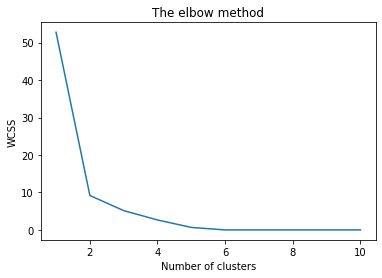

In [8]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [14]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(dataset)


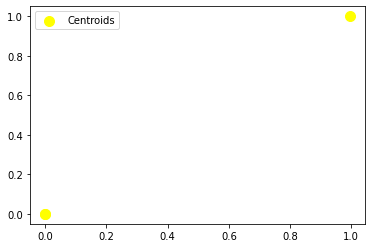

In [15]:
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [16]:
print(len(y_kmeans))

195


In [17]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [18]:
bb=dict(zip(list(y_kmeans),[list(y_kmeans).count(i) for i in list(y_kmeans)]))
print(bb)

{0: 190, 2: 2, 1: 3}


In [19]:
max_key = max(bb, key=bb.get)
print(max_key)

0


In [20]:
df_out = list(zip(cusid,y_kmeans))

In [21]:
df_out

[('C00001', 0),
 ('C00002', 0),
 ('C00003', 0),
 ('C00004', 0),
 ('C00005', 0),
 ('C00006', 0),
 ('C00007', 0),
 ('C00008', 0),
 ('C00009', 0),
 ('C00010', 0),
 ('C00011', 0),
 ('C00012', 0),
 ('C00013', 0),
 ('C00014', 0),
 ('C00015', 0),
 ('C00016', 0),
 ('C00017', 0),
 ('C00018', 0),
 ('C00019', 0),
 ('C00020', 0),
 ('C00021', 0),
 ('C00022', 0),
 ('C00023', 0),
 ('C00024', 0),
 ('C00025', 0),
 ('C00026', 0),
 ('C00027', 0),
 ('C00028', 0),
 ('C00029', 0),
 ('C00030', 0),
 ('C00031', 0),
 ('C00032', 0),
 ('C00033', 0),
 ('C00034', 0),
 ('C00035', 0),
 ('C00036', 0),
 ('C00037', 0),
 ('C00038', 0),
 ('C00039', 0),
 ('C00040', 2),
 ('C00041', 0),
 ('C00042', 0),
 ('C00043', 0),
 ('C00044', 0),
 ('C00045', 0),
 ('C00046', 0),
 ('C00047', 0),
 ('C00048', 0),
 ('C00049', 0),
 ('C00050', 0),
 ('C00051', 0),
 ('C00052', 0),
 ('C00053', 0),
 ('C00054', 0),
 ('C00055', 0),
 ('C00056', 0),
 ('C00057', 0),
 ('C00058', 0),
 ('C00059', 0),
 ('C00060', 0),
 ('C00061', 0),
 ('C00062', 0),
 ('C0006

In [22]:
check = []
for id,_group in df_out:
  if _group != max_key:
    check.append([id,_group])

In [23]:
check

[['C00040', 2], ['C00141', 2], ['C00179', 1], ['C00180', 1], ['C00181', 1]]

In [24]:
out_v = []
d = []
for id,_group in check:
  v = df.loc[df_old['CustomID'] == id]
  d.append([id,_group])
  #v['custid']=id
  #v['group']=_group
  out_v.append(v)
for x,y in zip(d,out_v):
  print(x)
  print(y.items)

['C00040', 2]
<bound method DataFrame.items of     A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
39  0  0  0  0   0   0   1   0   0   1   0   1   1   1   0>
['C00141', 2]
<bound method DataFrame.items of      A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
140  0  0  0  0   0   0   0   1   1   1   1   1   1   1   1>
['C00179', 1]
<bound method DataFrame.items of      A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
178  0  0  0  0   0   0   1   0   1   0   1   0   1   1   1>
['C00180', 1]
<bound method DataFrame.items of      A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
179  0  0  0  0   0   1   1   0   1   0   1   0   1   1   1>
['C00181', 1]
<bound method DataFrame.items of      A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
180  0  0  0  0   0   0   1   0   1   0   1   0   1   1   1>
